## Publication

Ttile: "Understanding the Microecological Factors That Control the Porphyromonas Gingivalis Colonization"

Authors: Moemen Hussein, Arnab Barua, Patricia Diaz-Moreno, Haralampos Hatzikirou



# Pcakages

In [ ]:
# Standard
import os
import sys
import numpy as np


# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
from matplotlib.ticker import MaxNLocator, LogLocator

# SciPy
from scipy.stats import gaussian_kde
from scipy.integrate import odeint
from scipy.optimize import differential_evolution, root_scalar

# Other
from cycler import cycler
from ipywidgets import interact, FloatSlider
import seaborn as sns

Figuers settings

In [ ]:
# ----------------------------
# Publication-quality plotting
# ----------------------------


# Minimal, npj-friendly rcParams with enhanced visual polish
mpl.rcParams.update({
    "figure.dpi": 300,
    "savefig.dpi": 600,
    "savefig.bbox": "tight",
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "font.family": "serif",
    "font.serif": ["Palatino", "Times New Roman", "DejaVu Serif"],
    "font.size": 9,
    "axes.labelsize": 9,
    "axes.titlesize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
    "axes.linewidth": 0.8,
    "xtick.major.width": 0.8,
    "ytick.major.width": 0.8,
    "xtick.minor.width": 0.6,
    "ytick.minor.width": 0.6,
    "lines.linewidth": 1.5,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": ":",
    "axes.prop_cycle": cycler(color=[
        "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7"
    ]),
})





MONOCHROME = False  # override palette if True

import os

def save_all(fname_base):
    # Ensure filename is valid and save to current working directory
    fname_base_clean = "".join(c if c.isalnum() or c in "._-" else "_" for c in fname_base)
    print("Saving figures to:", os.getcwd())
    for ext in ['pdf', 'svg', 'png']:
        plt.savefig(f"{fname_base_clean}.{ext}", dpi=600 if ext == 'png' else None, bbox_inches="tight", metadata={"Creator": "Matplotlib"})

def _panel_label(ax, label):
    ax.text(0.0, 1.02, label, transform=ax.transAxes, va="bottom", ha="left",
            fontsize=9, fontweight="bold")

def _kde_linear(x, grid=None, bw="scott"):
    x = np.asarray(x, float)
    if grid is None:
        lo, hi = np.nanpercentile(x, [0.5, 99.5])
        if not np.isfinite(lo) or not np.isfinite(hi) or lo >= hi:
            lo, hi = np.nanmin(x), np.nanmax(x) + 1e-12
        pad = 0.05 * (hi - lo)
        grid = np.linspace(lo - pad, hi + pad, 512)
    kde = gaussian_kde(x, bw_method=bw)
    return grid, kde(grid)

def _kde_log10_to_linear(x, grid=None, bw="scott"):
    x = np.asarray(x, float)
    x = np.clip(x, 1e-300, None)
    y = np.log10(x)
    if grid is None:
        lo, hi = np.nanpercentile(y, [0.5, 99.5])
        if not np.isfinite(lo) or not np.isfinite(hi) or lo >= hi:
            lo, hi = np.nanmin(y), np.nanmax(y) + 1e-12
        pad = 0.05 * (hi - lo)
        y_grid = np.linspace(lo - pad, hi + pad, 512)
    else:
        y_grid = np.log10(np.clip(grid, 1e-300, None))
    kde = gaussian_kde(y, bw_method=bw)
    p_y = kde(y_grid)
    x_grid = 10**y_grid
    density_linear = p_y / (x_grid * np.log(10.0))
    return x_grid, density_linear

def _jitter(x, frac=0.02):
    x = np.asarray(x, float)
    span = (x.max() - x.min()) if x.size and x.max() > x.min() else 1.0
    return x + np.random.default_rng(42).normal(scale=frac * span, size=x.shape)


def _panel_label(ax, label):
    ax.text(-0.08, 1.02, label, transform=ax.transAxes,
            va="bottom", ha="left", fontsize=9, fontweight="bold")



# Allee effect Model

Run 1: r = 0.6529, K = 2.08e+09, A = 4.59e+07, Cost = 1.7448
Run 2: r = 0.6529, K = 2.08e+09, A = 4.59e+07, Cost = 1.7448
Run 3: r = 0.6529, K = 2.08e+09, A = 4.59e+07, Cost = 1.7448
Run 4: r = 0.6529, K = 2.08e+09, A = 4.59e+07, Cost = 1.7448
Run 5: r = 0.6529, K = 2.08e+09, A = 4.59e+07, Cost = 1.7448
Run 6: r = 0.6529, K = 2.08e+09, A = 4.59e+07, Cost = 1.7448
Run 7: r = 0.6529, K = 2.08e+09, A = 4.59e+07, Cost = 1.7448
Run 8: r = 0.6529, K = 2.08e+09, A = 4.59e+07, Cost = 1.7448
Run 9: r = 0.6529, K = 2.08e+09, A = 4.59e+07, Cost = 1.7448
Run 10: r = 0.6529, K = 2.08e+09, A = 4.59e+07, Cost = 1.7448

Parameter Estimation Summary:
Mean r = 0.6529 ± 0.0000
Mean K = 2.08e+09 ± 3.09e+05
Mean A = 4.59e+07 ± 3.81e+03
Mean Cost = 1.7448 ± 0.0000


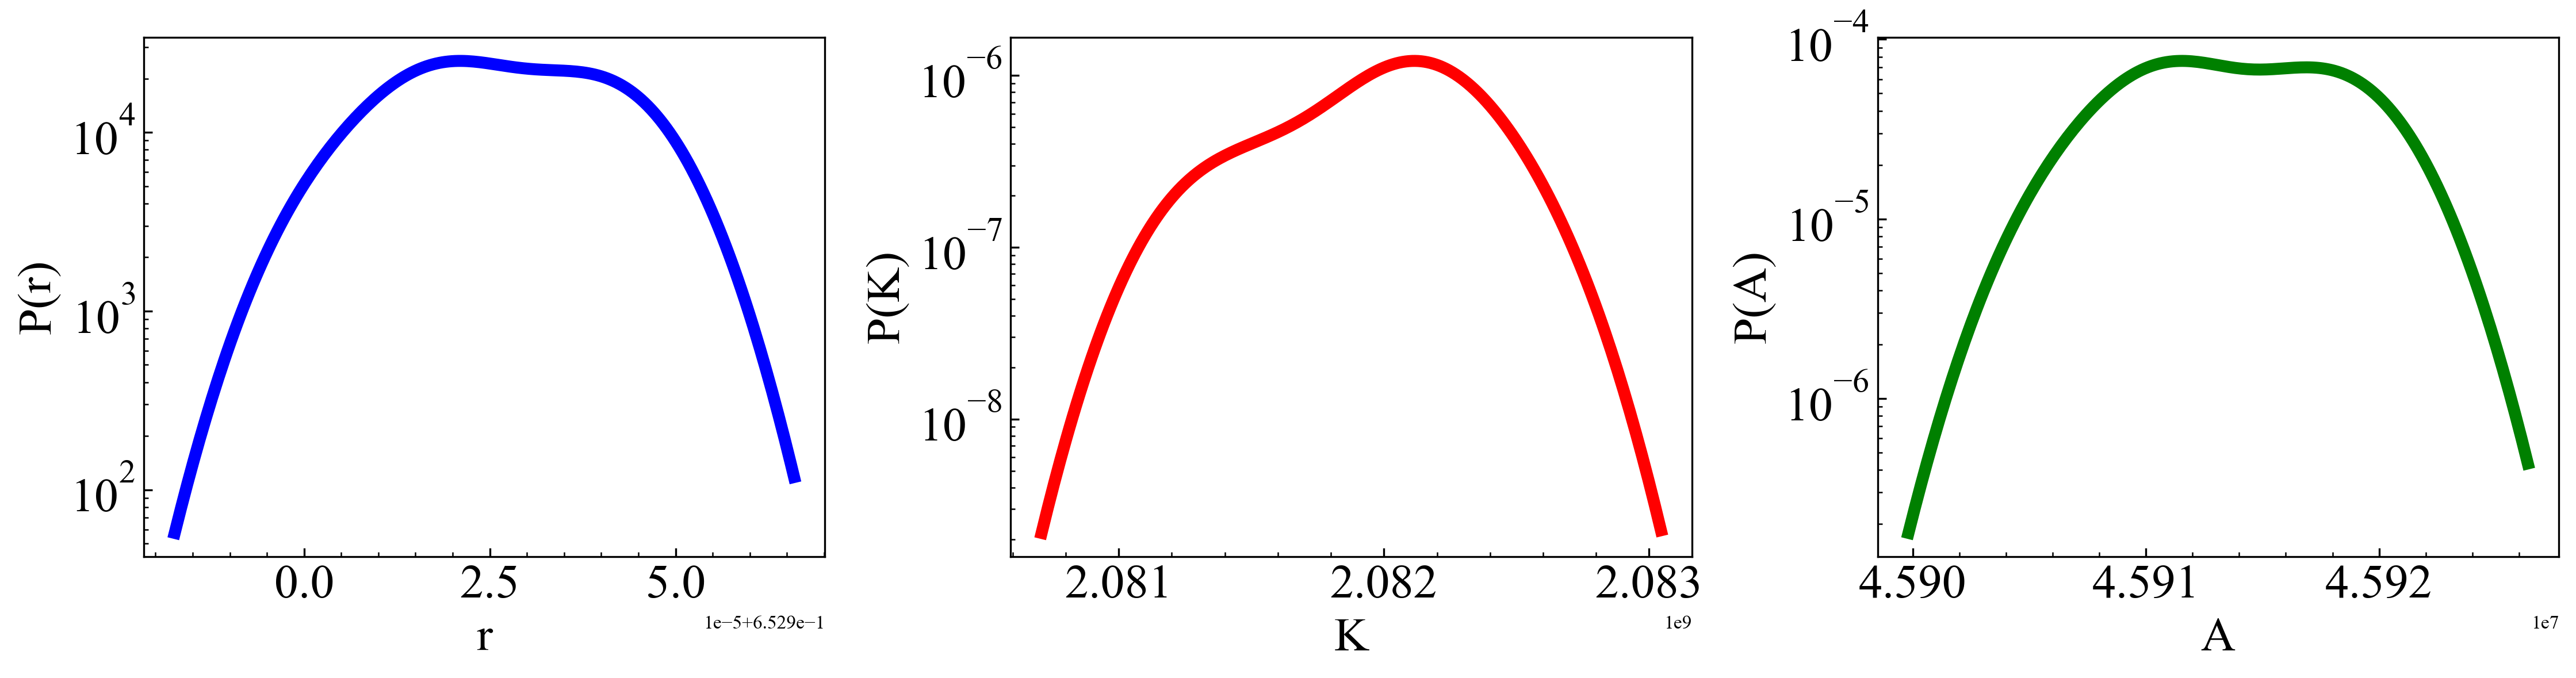

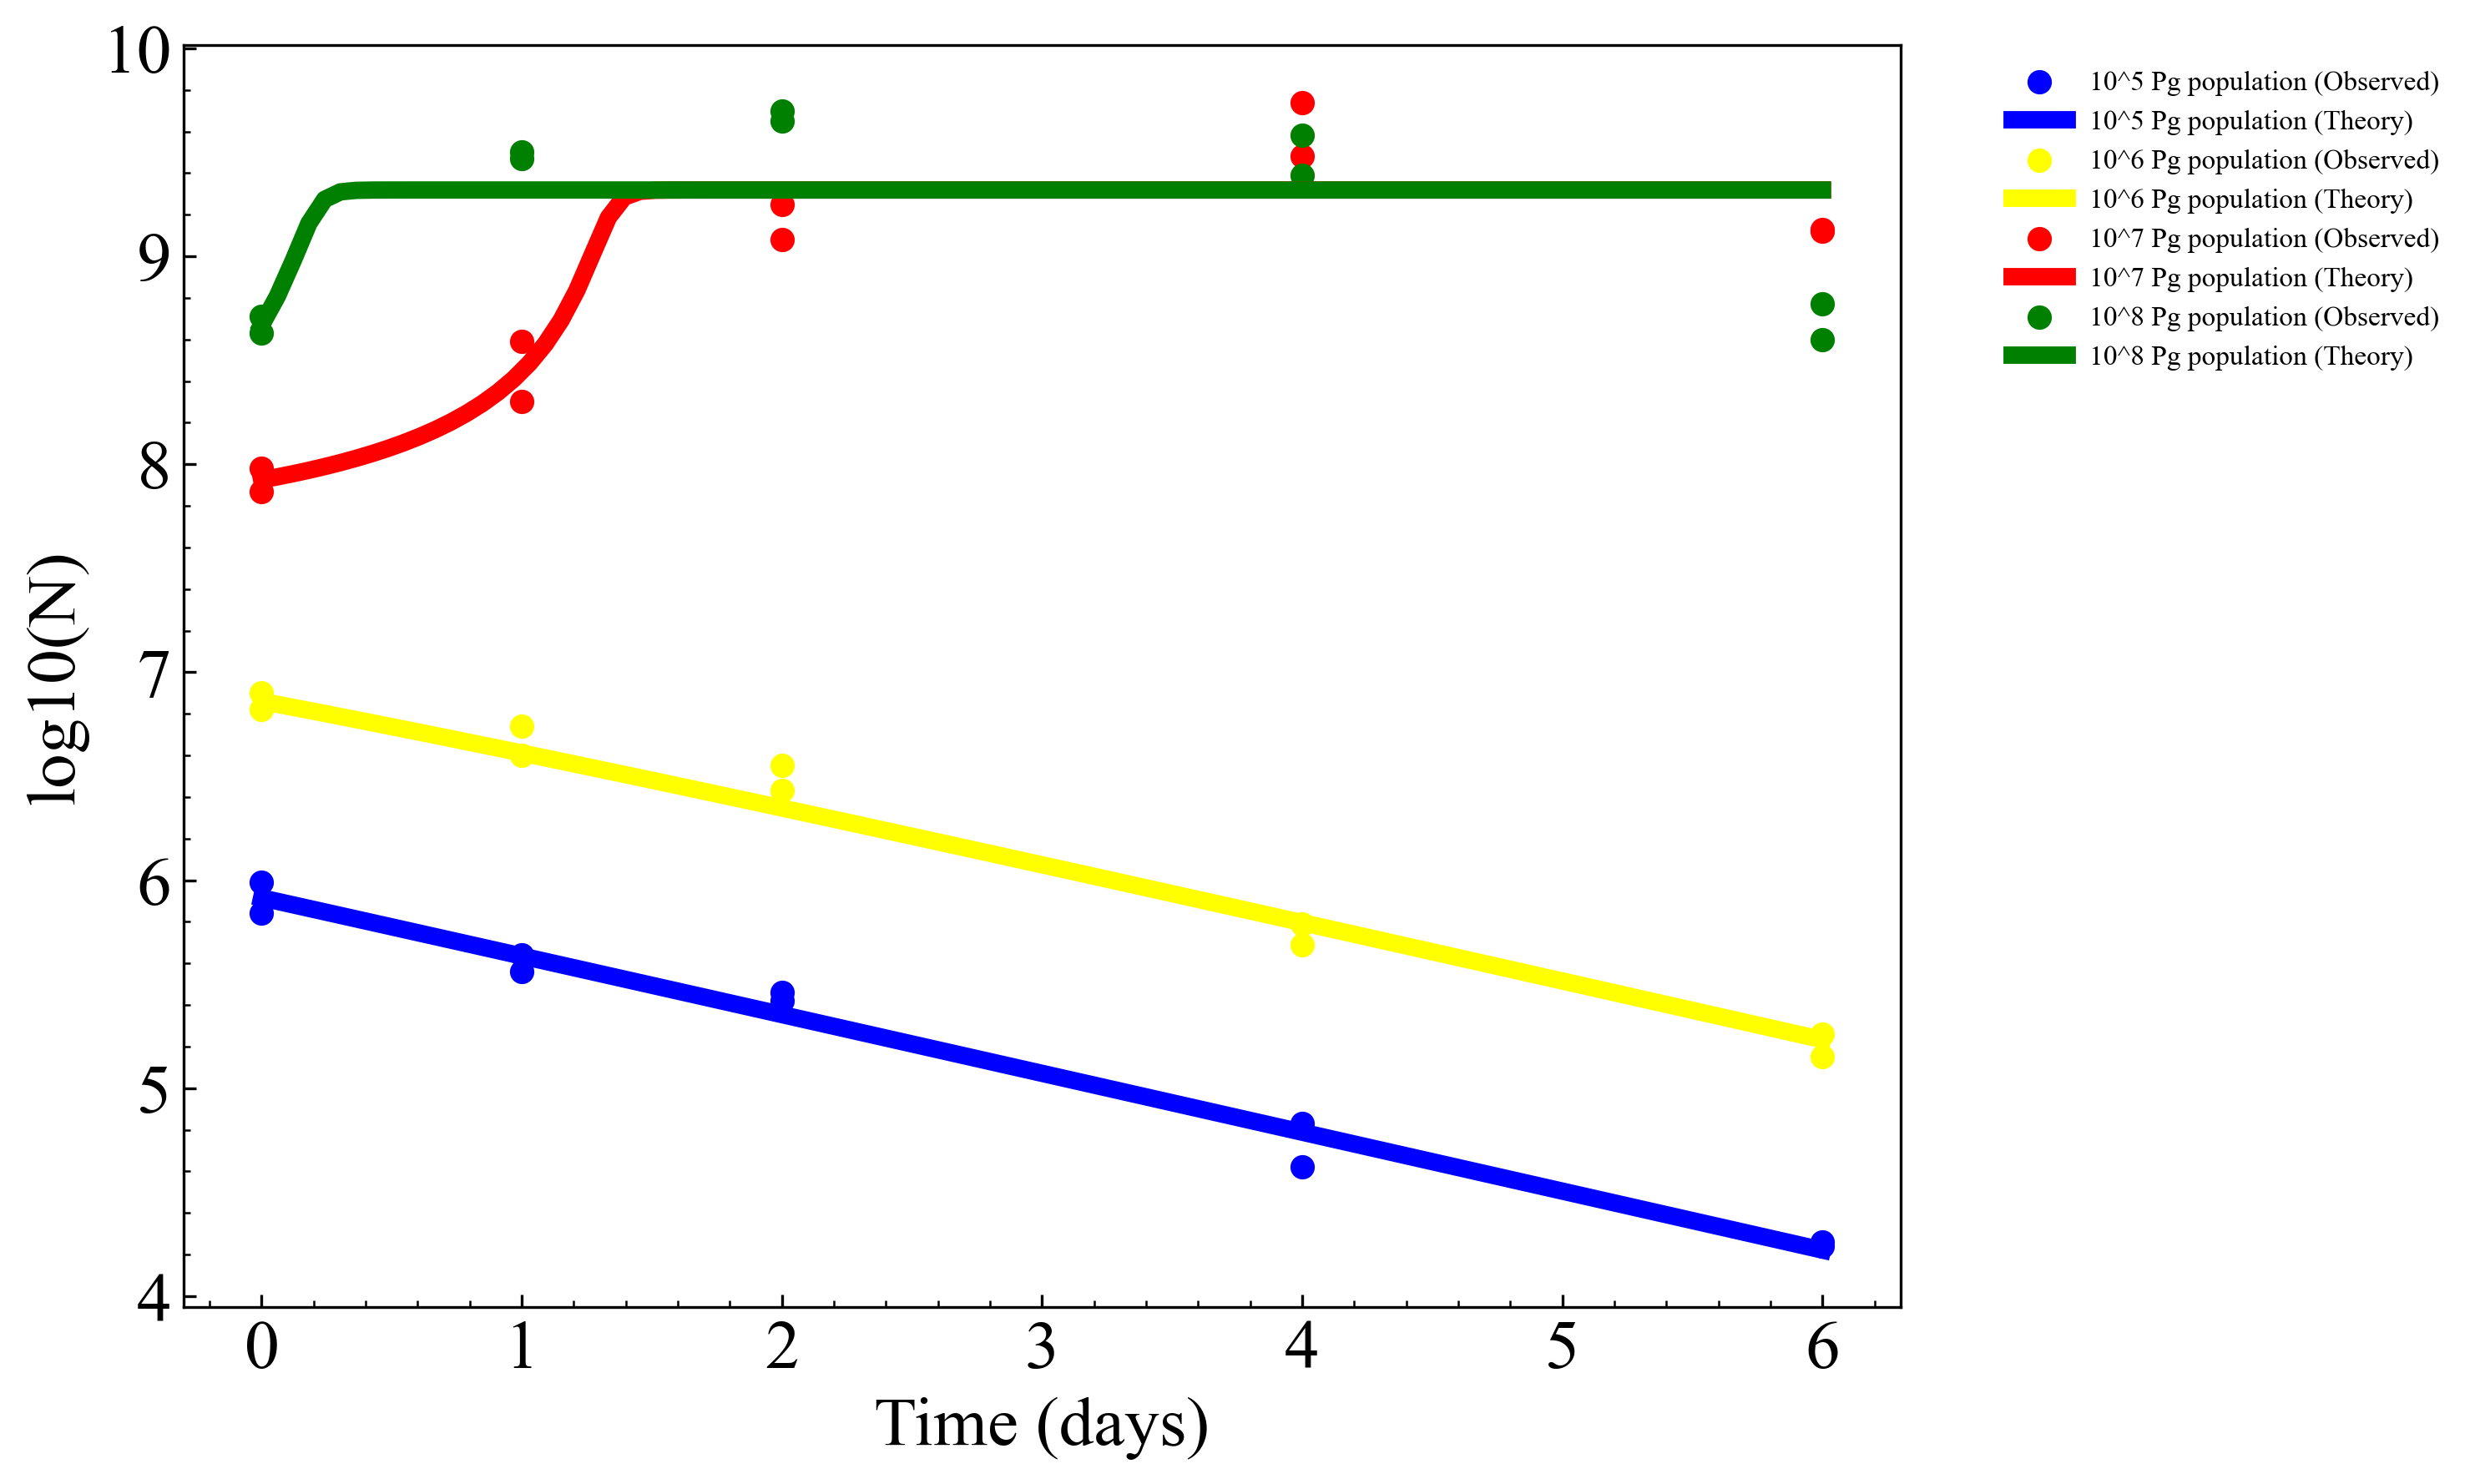

In [ ]:
# Data provided
days = np.array([0, 0, 1, 1, 2, 2, 4, 4, 6, 6])
logN_obs = {
    5: np.array([5.99, 5.84, 5.56, 5.64, 5.42, 5.46, 4.62, 4.83, 4.26, 4.24]),
    6: np.array([6.9, 6.82, 6.6, 6.74, 6.43, 6.55, 5.79, 5.69, 5.26, 5.15]),
    7: np.array([7.87, 7.98, 8.3, 8.59, 9.08, 9.25, 9.48, 9.74, 9.13, 9.12]),
    8: np.array([8.71, 8.63, 9.47, 9.5, 9.7, 9.65, 9.39, 9.58, 8.77, 8.6])
}

# Compute average initial population N0 for each concentration
N0_avg = {}
for exp in [5, 6, 7, 8]:
    idx_t0 = days == 0
    avg_logN_t0 = np.mean(logN_obs[exp][idx_t0])
    N0_avg[exp] = 10 ** avg_logN_t0

# Define the ODE function
def dN_dt(N, t, r, K, A):
    """ODE for population dynamics: dN/dt = -r * N * (1 - N/K) * (1 - N/A)"""
    return -r * N * (1 - N / K) * (1 - N / A)

# Function to solve ODE for a given initial condition and parameters
def solve_ode(N0, t, params):
    """Solve ODE with initial condition N0, time points t, and parameters [r, K, A]"""
    r, K, A = params
    # Ensure N0 and t are arrays, and parameters are valid
    N0 = np.array(N0, dtype=float)
    t = np.array(t, dtype=float)
    sol = odeint(dN_dt, N0, t, args=(r, K, A), tfirst=False)
    return sol.flatten()

# Cost function: sum of squared differences in log scale across all datasets
def cost_function(params):
    """Compute total error between observed and predicted log10(N)"""
    r, K, A = params
    total_error = 0
    t_unique = np.unique(days)  # Unique time points: [0, 1, 2, 4, 6]

    for exp in [5, 6, 7, 8]:
        N0 = N0_avg[exp]
        # Solve ODE
        sol = solve_ode(N0, t_unique, params)
        # Interpolate solution to match observation times
        sol_at_days = np.interp(days, t_unique, sol)
        # Compute predicted logN
        logN_pred = np.log10(np.maximum(sol_at_days, 1e-10))  # Avoid log(0)
        # Compute error
        total_error += np.sum((logN_pred - logN_obs[exp])**2)

    return total_error

# Bounds for parameters [r, K, A]
bounds = [(1e-3, 1), (0, 1e10), (0, 1e8)]

# Run differential evolution 10 times
n_runs = 10
params_list = []
cost_values = []

for i in range(n_runs):
    result = differential_evolution(cost_function, bounds, strategy='best1bin', maxiter=1000, popsize=15, tol=1e-6)
    params_list.append(result.x)
    cost_values.append(result.fun)
    print(f"Run {i+1}: r = {result.x[0]:.4f}, K = {result.x[1]:.2e}, A = {result.x[2]:.2e}, Cost = {result.fun:.4f}")

# Convert parameters to numpy array for analysis
params_array = np.array(params_list)

# Compute mean and standard deviation
mean_params = np.mean(params_array, axis=0)
std_params = np.std(params_array, axis=0)
mean_cost = np.mean(cost_values)
std_cost = np.std(cost_values)

# Print summary statistics
print("\nParameter Estimation Summary:")
print(f"Mean r = {mean_params[0]:.4f} ± {std_params[0]:.4f}")
print(f"Mean K = {mean_params[1]:.2e} ± {std_params[1]:.2e}")
print(f"Mean A = {mean_params[2]:.2e} ± {std_params[2]:.2e}")
print(f"Mean Cost = {mean_cost:.4f} ± {std_cost:.4f}")



Saving figures to: g:\Other computers\My Laptop\PhD\Spring 2025\pg


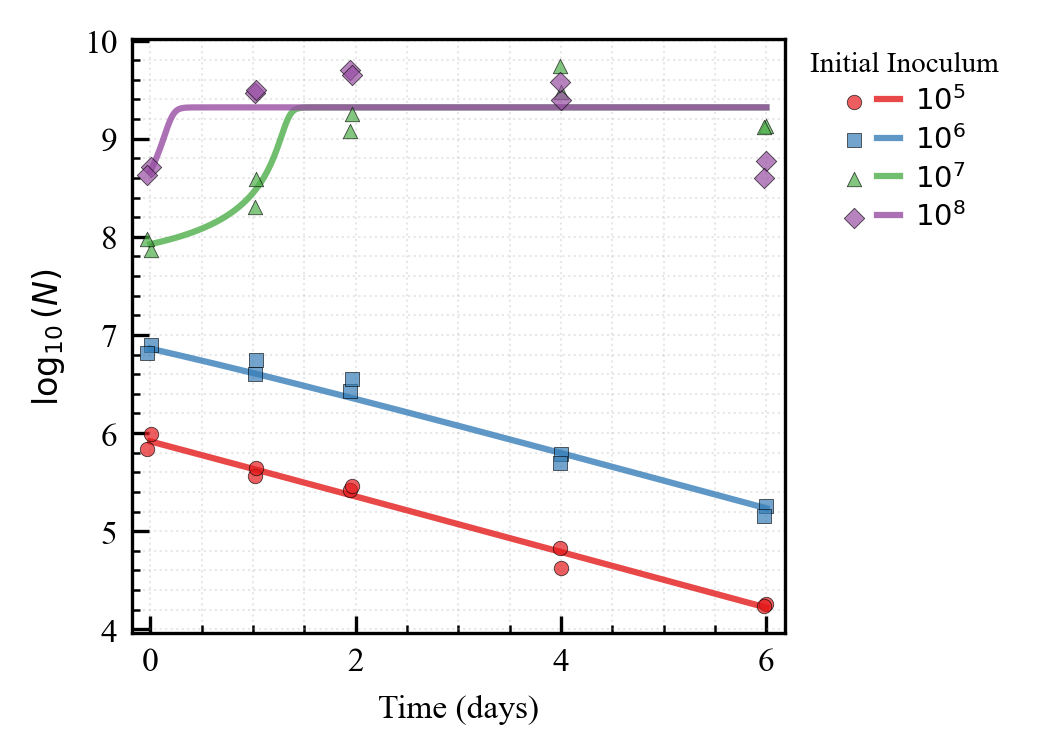

In [ ]:


# ---------- Figures: Observations vs. Model ----------

fig, ax = plt.subplots(figsize=(3.35, 2.4), constrained_layout=True)
t_fine = np.linspace(0, 6, 400)

colors = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3"]  # ColorBrewer Set1



markers = ["o", "s", "^", "D"]  # One marker per experiment
legend_items = []

for i, exp in enumerate([5, 6, 7, 8]):
    color = colors[i]
    marker = markers[i]

    jittered_days = _jitter(days, 0.005)
    obs = np.asarray(logN_obs[exp])

    # Scatter observations
    obs_artist = ax.scatter(jittered_days, obs, s=12, alpha=0.7, color=color,
                            marker=marker, label=rf"$10^{exp}$ observed", zorder=3, edgecolors='black', linewidths=0.2)

    # Model prediction
    sol = solve_ode(N0_avg[exp], t_fine, mean_params)
    logN_pred = np.log10(np.clip(sol, 1e-300, None))
    model_artist, = ax.plot(t_fine, logN_pred, color=color, alpha=0.8,
                            label=rf"$10^{exp}$ model", zorder=2)

    # Combine scatter and line into one legend entry
    legend_items.append(((obs_artist, model_artist), rf"$10^{exp}$"))

# Axis labels
ax.set_xlabel("Time (days)", fontsize=8)
ax.set_ylabel(r"$\log_{10}(N)$", fontsize=8)  # Clean math style



# Smart padded x-limits
x_min, x_max = np.min(days), np.max(days)
x_pad = 0.03 * (x_max - x_min)
ax.set_xlim(x_min - x_pad, x_max + x_pad)

# Smart padded y-limits
all_obs_vals = np.concatenate([np.asarray(logN_obs[exp]) for exp in [5, 6, 7, 8]])
y_min, y_max = np.min(all_obs_vals), np.max(all_obs_vals)
y_pad = 0.05 * (y_max - y_min)
ax.set_ylim(y_min - y_pad, y_max + y_pad)

# Grid styling
ax.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.3)
ax.tick_params(direction='in', length=4, width=0.8)

# Legend: Grouped entries (marker + line per exp)
ax.legend(
    handles=[pair for pair, _ in legend_items],
    labels=[lbl for _, lbl in legend_items],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    fontsize=7, frameon=False,
    title="Initial Inoculum", title_fontsize=7,
    bbox_to_anchor=(1.02, 1.0), loc="upper left",
    borderaxespad=0.0, labelspacing=0.3, handletextpad=0.5
)

# Panel label
# ax.text(-0.12, 1.03, "(d)", transform=ax.transAxes,
#         va="bottom", ha="left", fontsize=9, fontweight="bold")

# Save
save_all("fig_Allee_effect")
plt.show()
plt.close(fig)


# Vp Serum Media effect on Pg dynamics

In [ ]:
# Data provided

days = np.array([0, 1, 2, 4, 6])
logN_obs = {
    'Pg 25% Vp SM': np.array([6.04, 6.13, 6.37, 6.22, 5.68]),
    'Pg 50% Vp SM': np.array([5.99, 6.49, 7.21, 7.89, 7.54]),
    'Pg 75% Vp SM': np.array([5.974, 6.76, 6.56, 7.77, 8.05]),
    'Pg 100% Vp SM': np.array([6.015, 6.14, 5.88, 7.57, 8.79])
}

# Compute initial population N0 for each condition
N0_avg = {}
for condition in logN_obs.keys():
    idx_t0 = days == 0
    avg_logN_t0 = np.mean(logN_obs[condition][idx_t0])
    N0_avg[condition] = 10 ** avg_logN_t0

# Define the ODE
def dN_dt(N, t, r, K, A):
    return r * N * (1 - (N / K)) * (( N / A)-1)

# Function to solve ODE for a given initial condition and parameters
def solve_ode(N0, t, params):
    r, K, A = params
    sol = odeint(dN_dt, N0, t, args=(r, K, A))
    return sol.flatten()

# Cost function for a single condition
def cost_function(params, condition, t_unique):
    r, K, A = params
    N0 = N0_avg[condition]
    # Solve ODE
    sol = solve_ode(N0, t_unique, params)
    # Interpolate solution to match observation times
    sol_at_days = np.interp(days, t_unique, sol)
    # Compute predicted logN
    logN_pred = np.log10(np.maximum(sol_at_days, 1e-10))  # Avoid log(0)
    # Compute error
    total_error = np.sum((logN_pred - logN_obs[condition])**2)
    return total_error

# Bounds for parameters [r, K, A]
bounds = [(1e-3, 1), (0, 1e10), (0, 1e8)]

# Run differential evolution for each condition
n_runs = 10
t_unique = np.unique(days)  # Unique time points: [0, 1, 2, 4, 6, 8, 10]
params_dict = {condition: [] for condition in logN_obs.keys()}
cost_dict = {condition: [] for condition in logN_obs.keys()}

for condition in logN_obs.keys():
    print(f"\nFitting for {condition}:")
    for i in range(n_runs):
        result = differential_evolution(
            lambda params: cost_function(params, condition, t_unique),
            bounds,
            strategy='best1bin',
            maxiter=1000,
            popsize=15,
            tol=1e-6
        )
        params_dict[condition].append(result.x)
        cost_dict[condition].append(result.fun)
        print(f"Run {i+1}: r = {result.x[0]:.4f}, K = {result.x[1]:.2e}, A = {result.x[2]:.2e}, Cost = {result.fun:.4f}")

# Compute and print mean and standard deviation for each condition
print("\nParameter Estimation Summary:")
for condition in logN_obs.keys():
    params_array = np.array(params_dict[condition])
    mean_params = np.mean(params_array, axis=0)
    std_params = np.std(params_array, axis=0)
    mean_cost = np.mean(cost_dict[condition])
    std_cost = np.std(cost_dict[condition])
    print(f"\n{condition}:")
    print(f"Mean r = {mean_params[0]:.4f} ± {std_params[0]:.4f}")
    print(f"Mean K = {mean_params[1]:.2e} ± {std_params[1]:.2e}")
    print(f"Mean A = {mean_params[2]:.2e} ± {std_params[2]:.2e}")
    print(f"Mean Cost = {mean_cost:.4f} ± {std_cost:.4f}")




Fitting for Pg 25% Vp SM:
Run 1: r = 1.0000, K = 9.98e+09, A = 1.10e+06, Cost = 0.1802
Run 2: r = 1.0000, K = 9.99e+09, A = 1.10e+06, Cost = 0.1802
Run 3: r = 1.0000, K = 9.95e+09, A = 1.10e+06, Cost = 0.1802
Run 4: r = 1.0000, K = 9.99e+09, A = 1.10e+06, Cost = 0.1802
Run 5: r = 1.0000, K = 9.96e+09, A = 1.10e+06, Cost = 0.1802
Run 6: r = 1.0000, K = 9.94e+09, A = 1.10e+06, Cost = 0.1802
Run 7: r = 1.0000, K = 1.00e+10, A = 1.10e+06, Cost = 0.1802
Run 8: r = 1.0000, K = 9.99e+09, A = 1.10e+06, Cost = 0.1802
Run 9: r = 1.0000, K = 9.97e+09, A = 1.10e+06, Cost = 0.1802
Run 10: r = 1.0000, K = 9.98e+09, A = 1.10e+06, Cost = 0.1802

Fitting for Pg 50% Vp SM:
Run 1: r = 0.0010, K = 5.14e+07, A = 1.95e+03, Cost = 0.1052
Run 2: r = 0.0010, K = 5.14e+07, A = 1.95e+03, Cost = 0.1052
Run 3: r = 0.0010, K = 5.14e+07, A = 1.95e+03, Cost = 0.1052
Run 4: r = 0.0010, K = 5.14e+07, A = 1.95e+03, Cost = 0.1052
Run 5: r = 0.0010, K = 5.14e+07, A = 1.95e+03, Cost = 0.1052
Run 6: r = 0.0010, K = 5.14e+0

Saving figures to: g:\Other computers\My Laptop\PhD\Spring 2025\pg


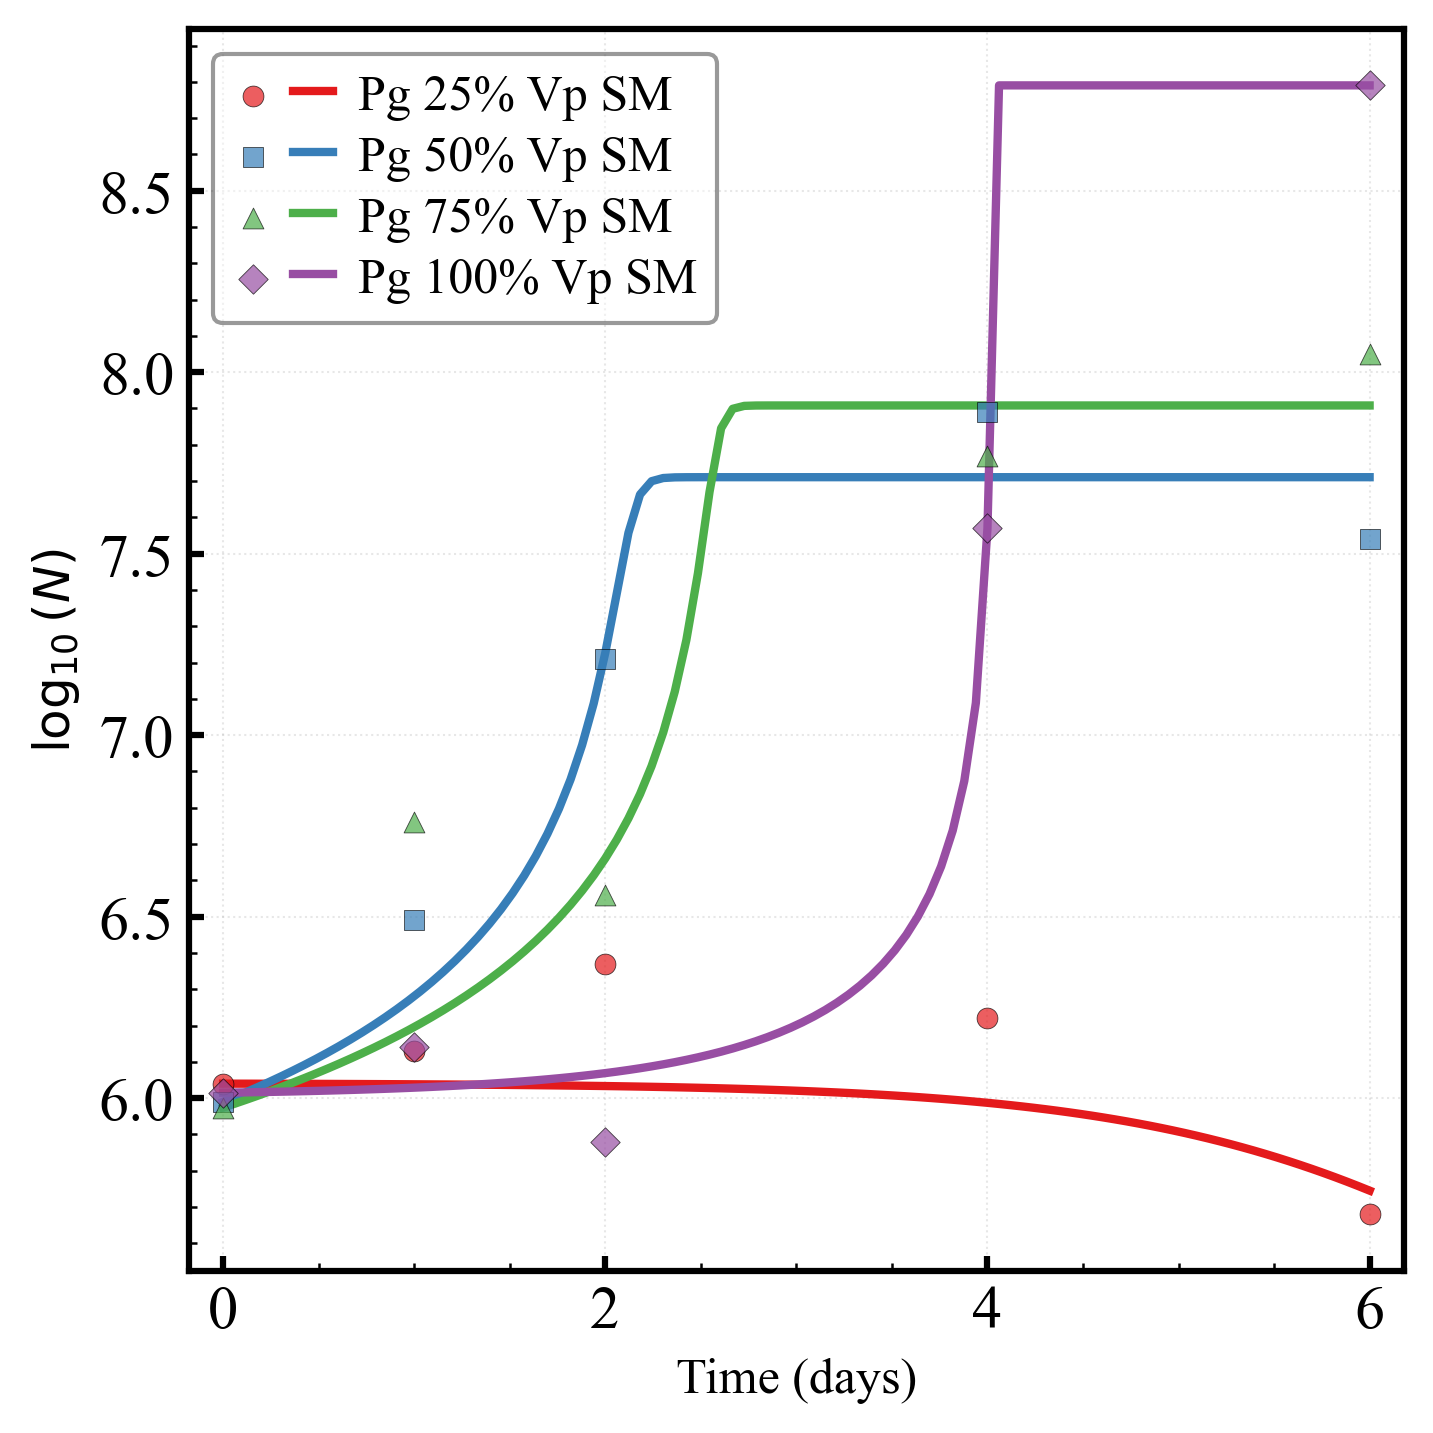

In [ ]:
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)       # or thicker, e.g., 1.5
    spine.set_edgecolor('black') # optional: make sure color is visible


plt.rcParams.update({
    "figure.dpi": 300, "savefig.dpi": 600,
    "pdf.fonttype": 42, "ps.fonttype": 42,
    "font.family": "serif",
    "font.serif": ["Palatino", "Times New Roman", "DejaVu Serif"],
    "font.size": 14, "axes.labelsize": 14, "axes.titlesize": 14,
    "xtick.labelsize": 14, "ytick.labelsize": 14, "legend.fontsize": 14,
    "axes.linewidth": 1, "xtick.major.width": 1, "ytick.major.width": 1,
    "xtick.direction": "in", "ytick.direction": "in",
    "xtick.minor.visible": True, "ytick.minor.visible": True,
    "lines.linewidth": 1.5, "axes.grid": True,
    "grid.alpha": 0.3, "grid.linestyle": ":", "legend.frameon": False
})

# ---------- Plot results with mean parameters ----------
fig, ax = plt.subplots(figsize=(5, 5))
t_fine = np.linspace(0, 6, 100)

colors = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3"]  # ColorBrewer Set1

markers = ["o", "s", "^", "D"]
legend_items = []

for i, condition in enumerate(logN_obs.keys()):
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]

    # Observed data (scatter)
    obs_vals = np.asarray(logN_obs[condition])
    scatter = ax.scatter(days, obs_vals, marker=marker, color=color, alpha=0.7,
                         s=25, zorder=3,edgecolors='black', linewidths=0.2)

    # Model prediction (line)
    params_array = np.array(params_dict[condition])
    mean_params = np.mean(params_array, axis=0)
    sol = solve_ode(N0_avg[condition], t_fine, mean_params)
    logN_pred = np.log10(np.maximum(sol, 1e-10))
    line, = ax.plot(t_fine, logN_pred, color=color, lw=2, linestyle='-',
                    zorder=2)

    # Add grouped legend entry
    legend_items.append(((scatter, line), condition))

# Axes
ax.set_xlabel("Time (days)", fontsize=12)
ax.set_ylabel(r"$\log_{10}(N)$", fontsize=12)

# Smart padded x-limits
x_pad = 0.03 * (np.max(days) - np.min(days))
ax.set_xlim(np.min(days) - x_pad, np.max(days) + x_pad)

# Smart padded y-limits
all_vals = np.concatenate(list(logN_obs.values()))
y_pad = 0.05 * (np.max(all_vals) - np.min(all_vals))
ax.set_ylim(np.min(all_vals) - y_pad, np.max(all_vals) + y_pad)

# Ticks & grid
ax.tick_params(axis='both', labelsize=14.5, width=1.5, direction='in')
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.3)



# Legend: Grouped entries (scatter + line)
ax.legend(
    handles=[pair for pair, _ in legend_items],
    labels=[lbl for _, lbl in legend_items],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    fontsize=12,     frameon=True,              # draw box
    facecolor="white",         # white background
    edgecolor="black",         # black border
    fancybox=True,             # rounded corners
    framealpha=0.4,            # slight transparency
    title="", title_fontsize=12,
    bbox_to_anchor=(.02, .98), loc="upper left",
    borderaxespad=0.0, labelspacing=0.3, handletextpad=0.5
)

plt.tight_layout()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)       # or thicker, e.g., 1.5
    spine.set_edgecolor('black') # optional: make sure color is visible

# Save
save_all("fig_vp_sm")
plt.show()
plt.close(fig)

Parameter Estimation Summary

In [ ]:
# Parameter Estimation Summary:

# Pg 25% Vp SM:
# Mean r = 0.4718 ± 0.2428
# Mean K = 1.11e+07 ± 4.16e+01
# Mean A = 5.31e+04 ± 6.09e+04
# Mean Cost = 0.3779 ± 0.0000

# Pg 50% Vp SM:
# Mean r = 0.4848 ± 0.2337
# Mean K = 3.07e+08 ± 7.03e+03
# Mean A = 3.68e+05 ± 1.38e+05
# Mean Cost = 0.1636 ± 0.0000

# Pg 75% Vp SM:
# Mean r = 0.5452 ± 0.1883
# Mean K = 2.75e+08 ± 2.16e+04
# Mean A = 3.85e+05 ± 1.03e+05
# Mean Cost = 1.0190 ± 0.0000

# Pg 100% Vp SM:
# Mean r = 0.0010 ± 0.0000
# Mean K = 1.11e+09 ± 1.83e+05
# Mean A = 2.36e+03 ± 3.63e-01
# Mean Cost = 1.2029 ± 0.0000

Saving figures to: g:\Other computers\My Laptop\PhD\Spring 2025\pg


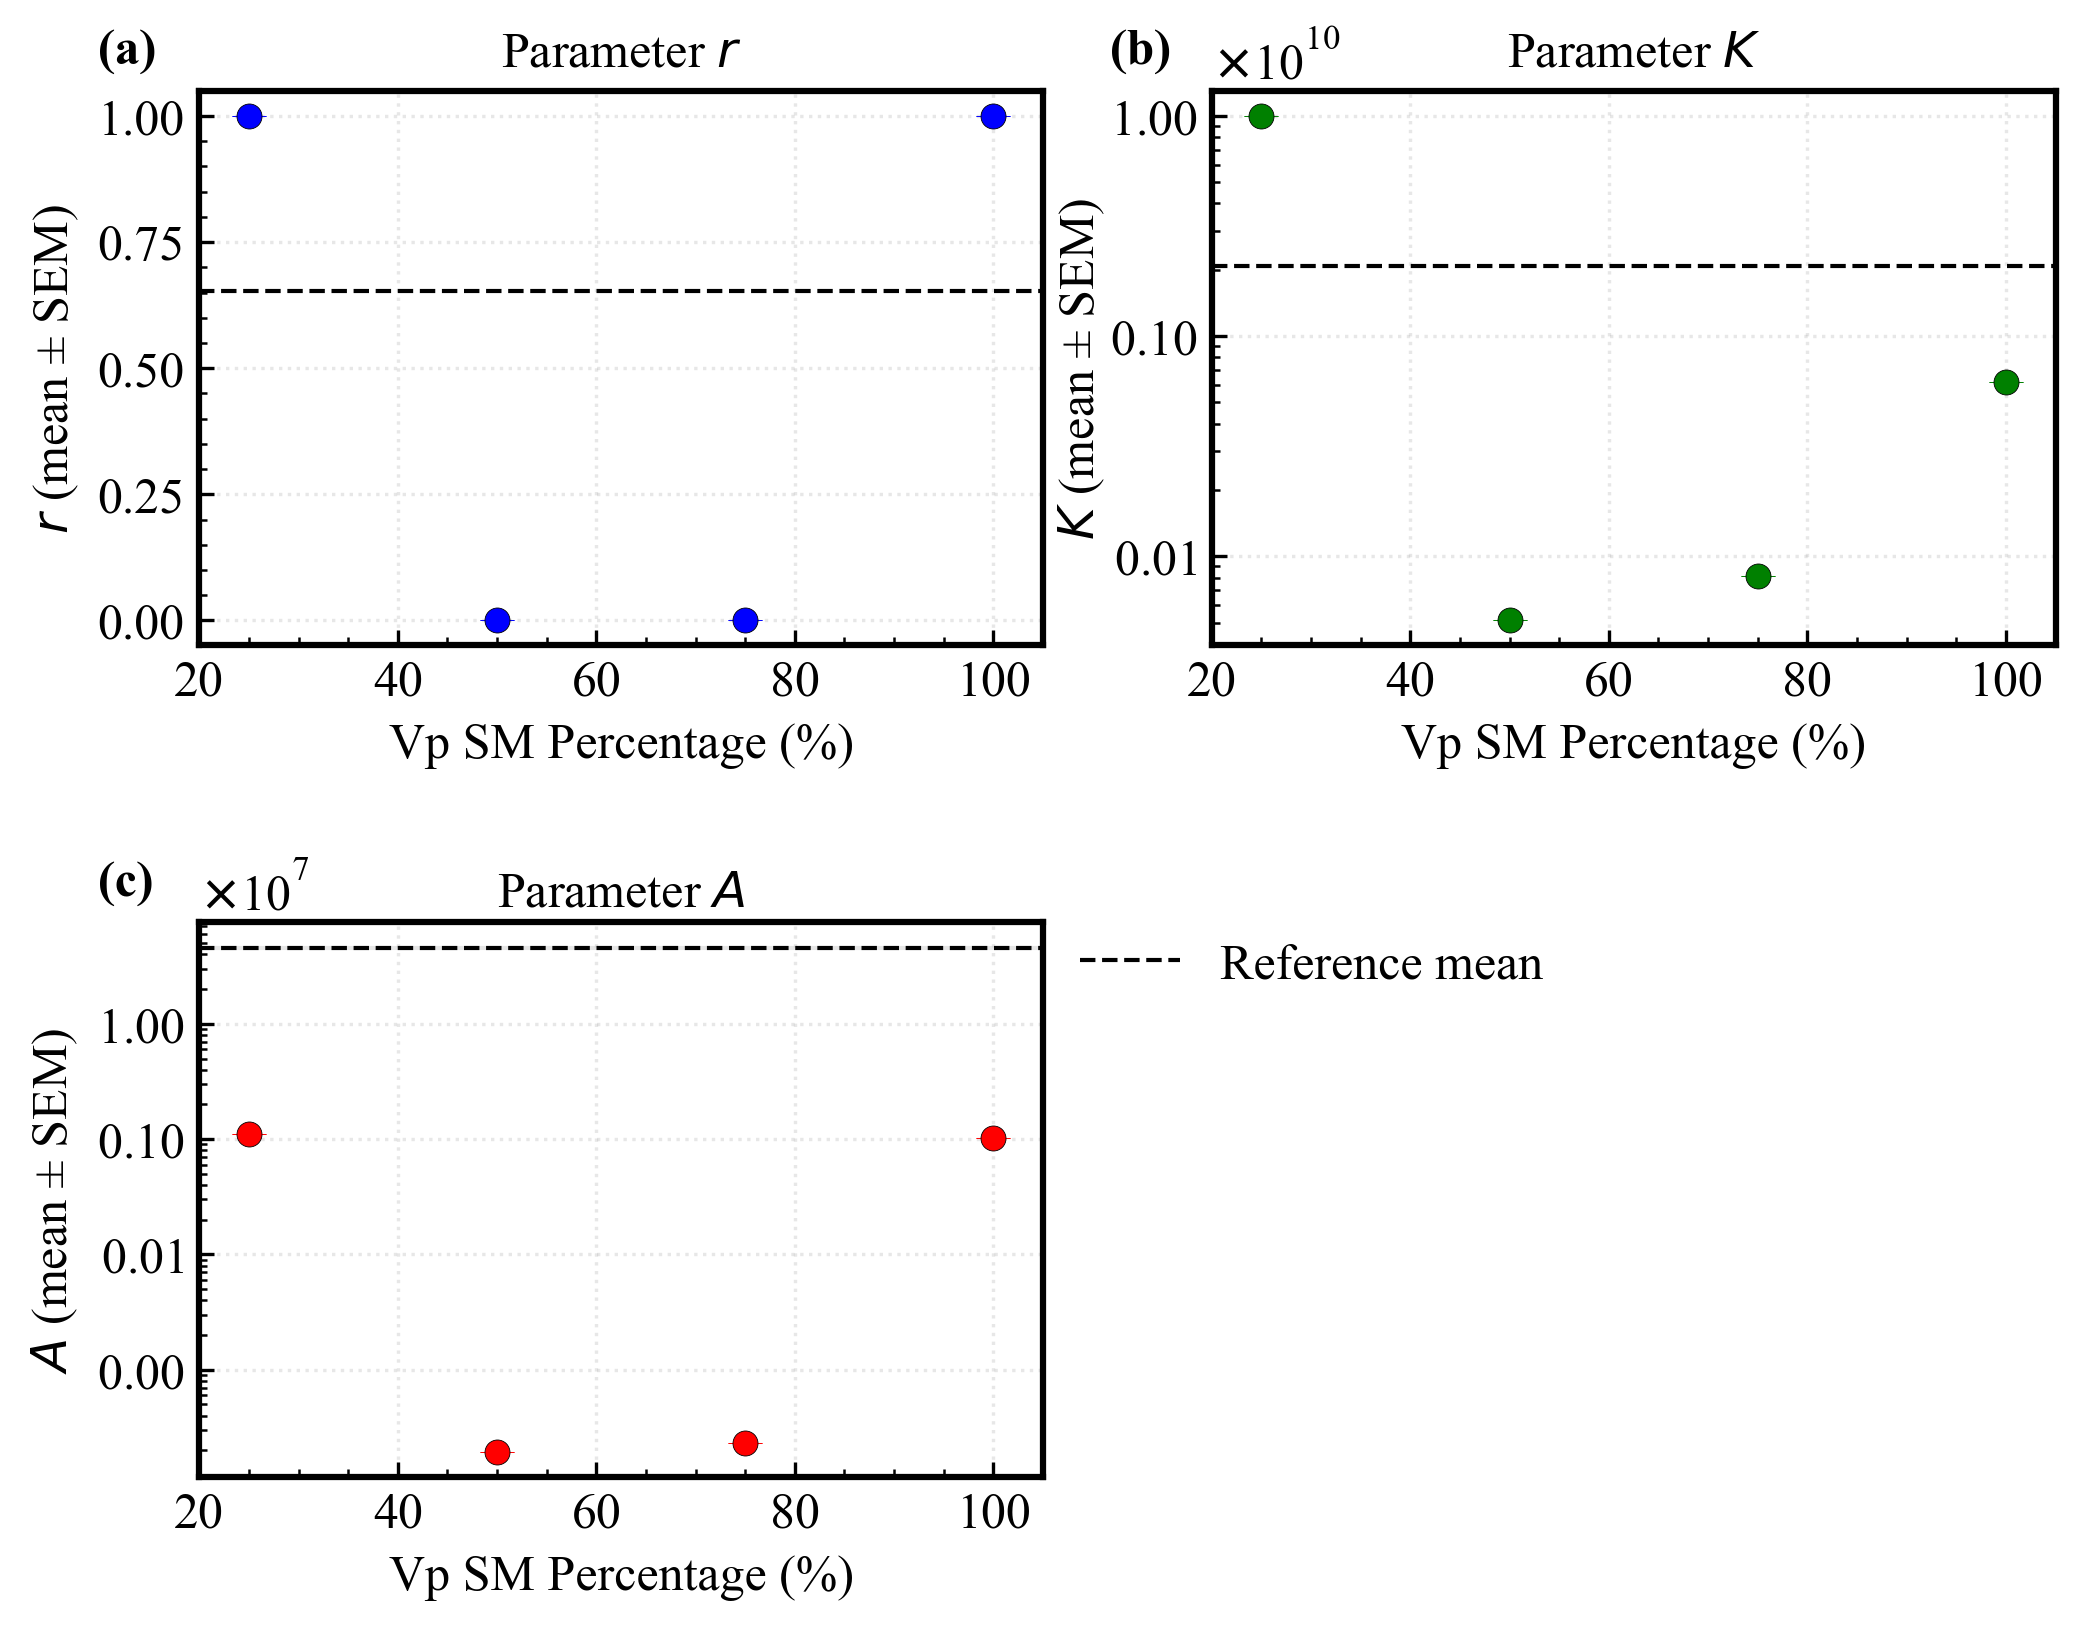

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, LogLocator

plt.rcParams.update({
    "figure.dpi": 300, "savefig.dpi": 600,
    "pdf.fonttype": 42, "ps.fonttype": 42,
    "font.family": "serif",
    "font.serif": ["Palatino", "Times New Roman", "DejaVu Serif"],
    "font.size": 12, "axes.labelsize": 12, "axes.titlesize": 12,
    "xtick.labelsize": 12, "ytick.labelsize": 12, "legend.fontsize": 12,
    "axes.linewidth": 0.8, "xtick.major.width": 0.8, "ytick.major.width": 0.8,
    "xtick.direction": "in", "ytick.direction": "in",
    "xtick.minor.visible": True, "ytick.minor.visible": True,
    "lines.linewidth": 1.5, "axes.grid": True,
    "grid.alpha": 0.3, "grid.linestyle": ":", "legend.frameon": False
})

percentages = [25, 50, 75, 100]
r_means = [1.0000, 0.0010, 0.0010, 1.0000]; r_stds  = [0.0000, 0.0000, 0.0000, 0.0000]
K_means = [9.98e9, 5.14e7, 8.10e7, 6.17e8]; K_stds  = [1.85e7, 2.31e3, 7.94e3, 5.90e4]
A_means = [1.10e6, 1.95e3, 2.31e3, 1.02e6]; A_stds  = [8.52e-1, 1.01e-1, 1.91e-1, 3.74e-2]

r_reference_mean = 0.6529
K_reference_mean = 2.08e9
A_reference_mean = 4.59e7
A_reference_std  = 2.66e3

fig, axs = plt.subplots(2, 2, figsize=(4.5, 6), constrained_layout=False)
# make room at right for legend and add extra vertical gap (key change)
fig.subplots_adjust(right=1.5, hspace= .5)

def _panel_label(ax, label):
    ax.text(-0.12, 1.03, label, transform=ax.transAxes,
            va="bottom", ha="left", fontsize=12, fontweight="bold")

marker_kwargs = dict(fmt='o', capsize=4, markersize=6,
                     markeredgewidth=.2, markeredgecolor='black')


# (a) r — remove x-label to avoid overlap
ax = axs[0, 0]
ax.errorbar(percentages, r_means, yerr=r_stds/np.sqrt(10), color='blue', **marker_kwargs)
ax.axhline(r_reference_mean, linestyle="--", color="black", linewidth=1, label="Reference mean")
ax.set_xlabel("Vp SM Percentage (%)")  # <-- removed
ax.set_ylabel(r"$r$ (mean ± SEM)")
ax.set_title("Parameter $r$")
ax.set_xlim(20, 105)
_panel_label(ax, "(a)")

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)       # or thicker, e.g., 1.5
    spine.set_edgecolor('black') # optional: make sure color is visible

# (b) K — remove x-label to avoid overlap
ax = axs[0, 1]
ax.errorbar(percentages, K_means, yerr=K_stds/np.sqrt(10), color='green', **marker_kwargs)
ax.set_yscale("log")
ax.axhline(K_reference_mean, linestyle="--", color="black", linewidth=1, label="Reference mean")
ax.set_xlabel("Vp SM Percentage (%)")  # <-- removed
ax.set_ylabel(r"$K$ (mean ± SEM)", labelpad=.5)  # small pad for extra safety
ax.set_title("Parameter $K$")
ax.set_xlim(20, 105)
formatter_K = ScalarFormatter(useMathText=True); formatter_K.set_powerlimits((0, 0)); formatter_K.set_useOffset(True)
ax.yaxis.set_major_formatter(formatter_K)
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs="auto", numticks=10))
_panel_label(ax, "(b)")

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)       # or thicker, e.g., 1.5
    spine.set_edgecolor('black') # optional: make sure color is visible

# (c) A — keep x-label here (bottom row)
ax = axs[1, 0]
ax.errorbar(percentages, A_means, yerr=A_stds/np.sqrt(10), color='red', **marker_kwargs)
ax.axhline(A_reference_mean, linestyle="--", color="black", linewidth=1, label="Reference mean")
ax.fill_between([20, 105],
                max(A_reference_mean - A_reference_std/np.sqrt(10), 1e-10),
                A_reference_mean + A_reference_std/np.sqrt(10),
                color="gray", alpha=0.2, label="_nolegend_")
ax.set_yscale("log")
ax.set_xlabel("Vp SM Percentage (%)")
ax.set_ylabel(r"$A$ (mean ± SEM)")
ax.set_title("Parameter $A$", pad=4)  # small pad for extra safety
ax.set_xlim(20, 105)
formatter_A = ScalarFormatter(useMathText=True); formatter_A.set_powerlimits((0, 0)); formatter_A.set_useOffset(True)
ax.yaxis.set_major_formatter(formatter_A)
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs="auto", numticks=10))
# legend only here, outside upper-right
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0), borderaxespad=0)
_panel_label(ax, "(c)")

# (d) unused
axs[1, 1].axis("off")

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)       # or thicker, e.g., 1.5
    spine.set_edgecolor('black') # optional: make sure color is visible

save_all("fig_params_vs_sm")
plt.show()


# Stochastic Allee Effect Simulation

## Initial below (A) (N0 = 1e5)

Saving figures to: g:\Other computers\My Laptop\PhD\Spring 2025\pg


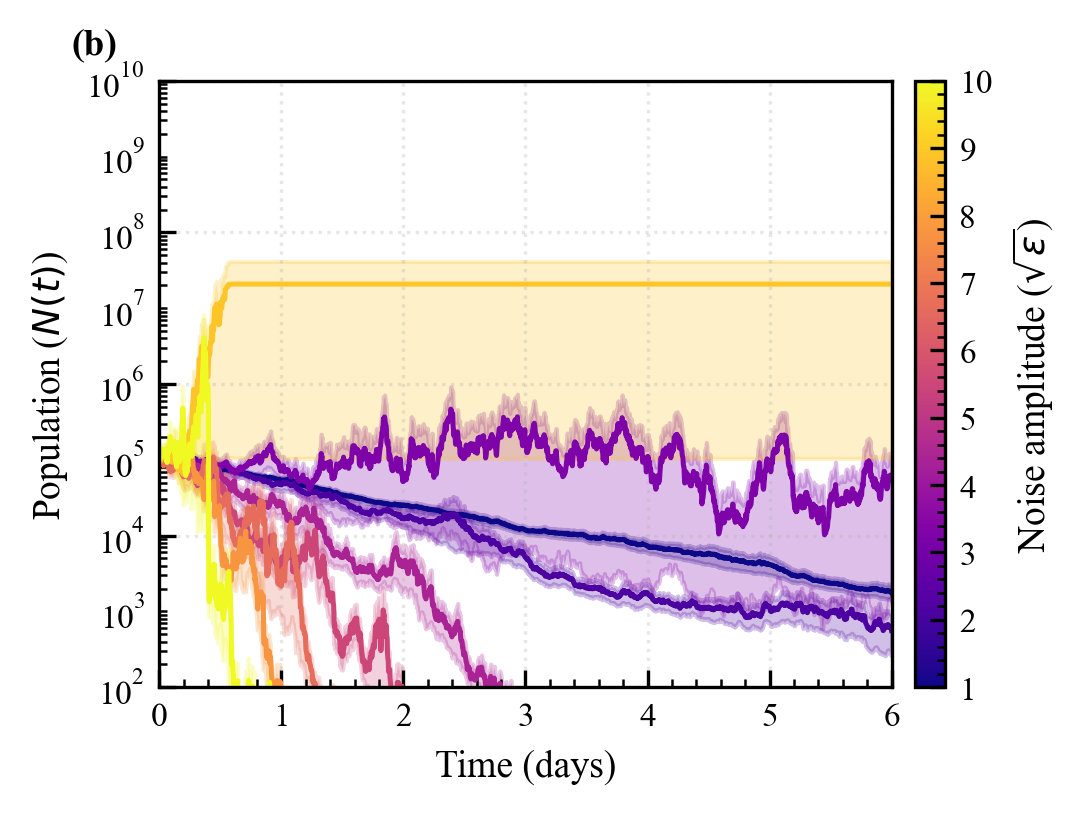

In [ ]:

# Parameters
K = 2.08e9
A_m = 4.59e7
r_m = 0.6529
N0 = 1e5
T = 6
dt = .003
num_steps = int(T / dt) + 1
t = np.linspace(0, T, num_steps)
num_trajectories = 100
epsilon_values = np.linspace(1, 10, 9)

avg_N = np.zeros((len(epsilon_values), num_steps))
std_N = np.zeros((len(epsilon_values), num_steps))

# Local RNG for reproducibility
rng = np.random.default_rng(seed=42)

# Simulation loop
for j, epsilon in enumerate(epsilon_values):
    trajectories = np.zeros((num_trajectories, num_steps))
    for k in range(num_trajectories):
        N = np.zeros(num_steps)
        N[0] = N0
        for i in range(num_steps - 1):
            if N[i] <= 0:
                N[i+1] = 0
                continue
            det = (r_m / A_m) * N[i] * (1 - N[i]/K) * (N[i] - A_m)
            stoch = - r_m * N[i] * (1 - N[i]/K) * epsilon * np.sqrt(dt) * rng.normal(0, 1)
            dN = det * dt + stoch
            N[i+1] = max(N[i] + dN, 0)
        trajectories[k] = N
    avg_N[j] = np.mean(trajectories, axis=0)
    std_N[j] = np.std(trajectories, axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(3.5, 2.6), constrained_layout=True)


cmap = plt.get_cmap('plasma')
norm = plt.Normalize(epsilon_values.min(), epsilon_values.max())

for j, epsilon in enumerate(epsilon_values):
    color = cmap(norm(epsilon))
    ax.plot(t, avg_N[j], color=color, lw=1.2, label=fr"$\epsilon$ = {epsilon:.1f}")
    ax.fill_between(t, avg_N[j] - std_N[j]/np.sqrt(num_trajectories),
                    avg_N[j] + std_N[j]/np.sqrt(num_trajectories),
                    color=color, alpha=0.25)

# Axis settings
ax.set_yscale('log')
ax.set_ylim(1e2, 1e10)
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1, 10)*0.1, numticks=11))


ax.set_xlabel("Time (days)")

ax.set_ylabel("Population ($N(t)$)")
ax.set_xlim(0, T)


ax.tick_params(length=4, width=0.8)
#ax.yaxis.set_major_locator(MaxNLocator(nbins=6))

# Colorbar instead of legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cb = plt.colorbar(sm, ax=ax, pad=0.02)
cb.set_label(r"Noise amplitude ($\sqrt{\epsilon}$)", fontsize=9)
cb.ax.tick_params(labelsize=8)

# Optional: add panel label
ax.text(-0.12, 1.03, "(b)", transform=ax.transAxes,
        va="bottom", ha="left", fontsize=9, fontweight="bold")


save_all("fig_stochastic_dynamics_e5")
plt.show()



## Initial above (A) (N0 = 1e8)

Saving figures to: g:\Other computers\My Laptop\PhD\Spring 2025\pg


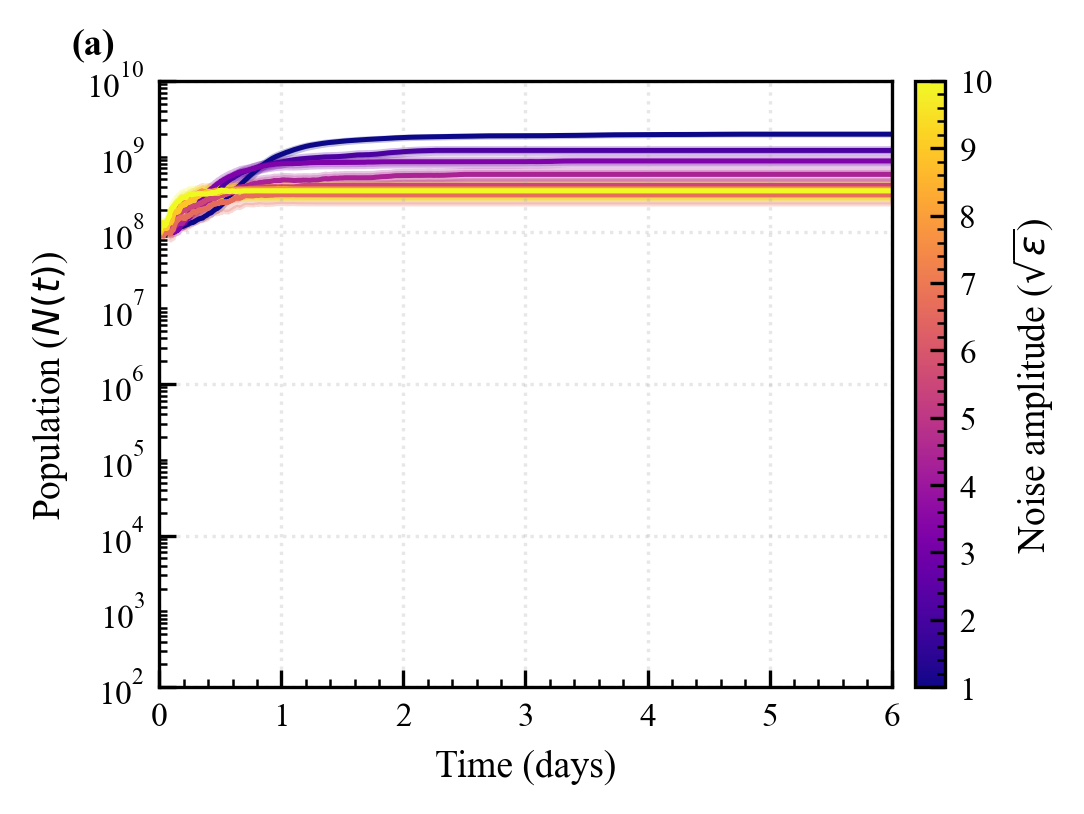

In [ ]:
# Parameters
K = 2.08e9
A_m = 4.59e7
r_m = 0.6529
N0 = 1e8
T = 6
dt = .003
num_steps = int(T / dt) + 1
t = np.linspace(0, T, num_steps)
num_trajectories = 100
epsilon_values = np.linspace(1, 10, 9)

avg_N = np.zeros((len(epsilon_values), num_steps))
std_N = np.zeros((len(epsilon_values), num_steps))

# Local RNG for reproducibility
rng = np.random.default_rng(seed=42)

# Simulation loop
for j, epsilon in enumerate(epsilon_values):
    trajectories = np.zeros((num_trajectories, num_steps))
    for k in range(num_trajectories):
        N = np.zeros(num_steps)
        N[0] = N0
        for i in range(num_steps - 1):
            if N[i] <= 0:
                N[i+1] = 0
                continue
            det = (r_m / A_m) * N[i] * (1 - N[i]/K) * (N[i] - A_m)
            stoch = - r_m * N[i] * (1 - N[i]/K) * epsilon * np.sqrt(dt) * rng.normal(0, 1)
            dN = det * dt + stoch
            N[i+1] = max(N[i] + dN, 0)
        trajectories[k] = N
    avg_N[j] = np.mean(trajectories, axis=0)
    std_N[j] = np.std(trajectories, axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(3.5, 2.6), constrained_layout=True)


cmap = plt.get_cmap('plasma')
norm = plt.Normalize(epsilon_values.min(), epsilon_values.max())

for j, epsilon in enumerate(epsilon_values):
    color = cmap(norm(epsilon))
    ax.plot(t, avg_N[j], color=color, lw=1.2, label=fr"$\epsilon$ = {epsilon:.1f}")
    ax.fill_between(t, avg_N[j] - std_N[j]/np.sqrt(num_trajectories),
                    avg_N[j] + std_N[j]/np.sqrt(num_trajectories),
                    color=color, alpha=0.25)

# Axis settings
ax.set_yscale('log')
ax.set_ylim(1e2, 1e10)
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1, 10)*0.1, numticks=11))



ax.set_xlabel("Time (days)")

ax.set_ylabel("Population ($N(t)$)")
ax.set_xlim(0, T)


ax.tick_params(length=4, width=0.8)
#ax.yaxis.set_major_locator(MaxNLocator(nbins=6))

# Colorbar instead of legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cb = plt.colorbar(sm, ax=ax, pad=0.02)
cb.set_label(r"Noise amplitude ($\sqrt{\epsilon}$)", fontsize=9)
cb.ax.tick_params(labelsize=8)

# Optional: add panel label
ax.text(-0.12, 1.03, "(a)", transform=ax.transAxes,
        va="bottom", ha="left", fontsize=9, fontweight="bold")


save_all("fig_stochastic_dynamics_e8")
plt.show()



## Nullclines plot for small noise

Saving figures to: g:\Other computers\My Laptop\PhD\Spring 2025\pg


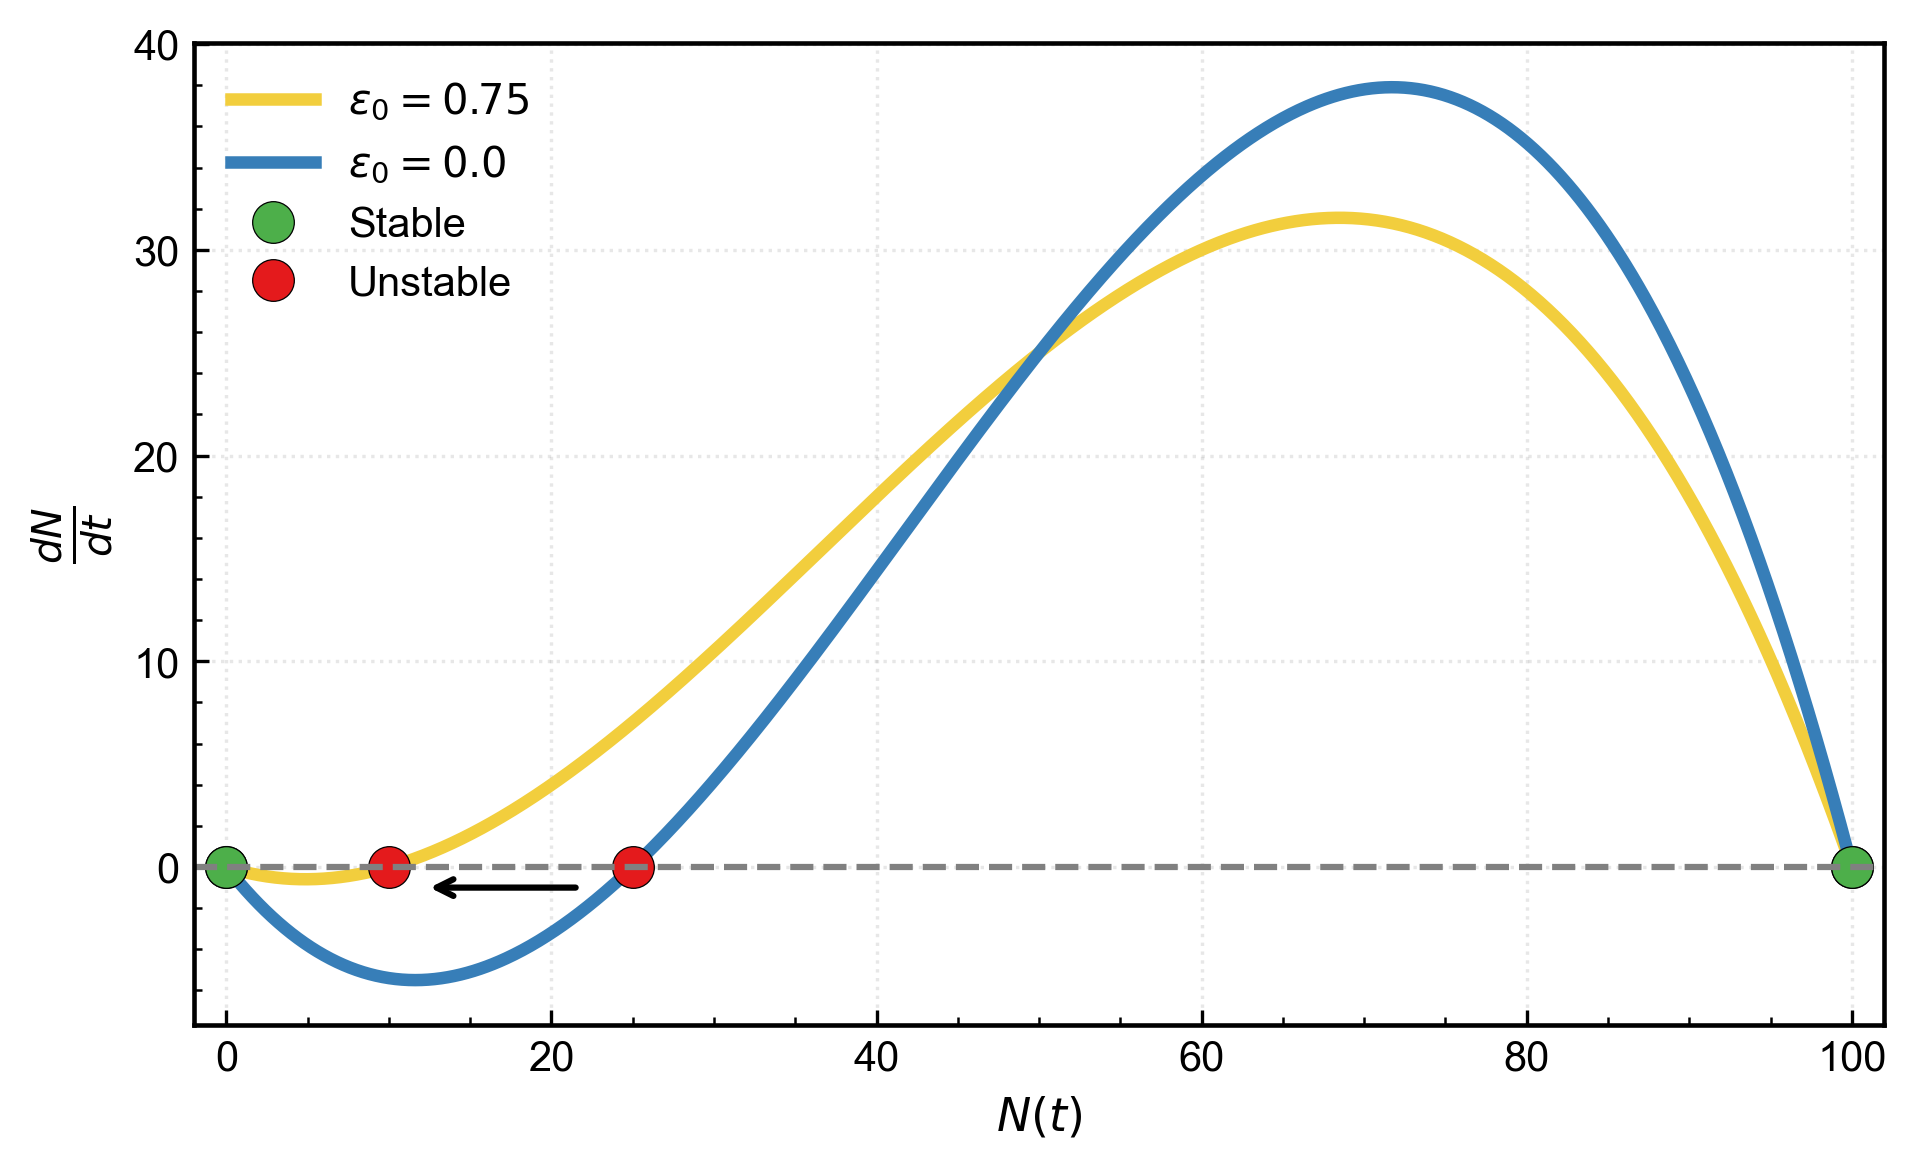

In [ ]:
mpl.rcParams.update({
    "figure.figsize": (6.5, 4.2),
    "figure.dpi": 300, "savefig.dpi": 300,
    "font.size": 10, "axes.labelsize": 11, "axes.titlesize": 11,
    "legend.fontsize": 10, "xtick.labelsize": 10, "ytick.labelsize": 10,
    "font.family": "sans-serif", "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
    "axes.spines.top": False, "axes.spines.right": False, "axes.linewidth": 1.0,
})

# Colorblind-safe (Okabe–Ito)
CBLUE   = "#F2CE3D"  # epsilon=0.75 curve
CGREEN  = "#377EB8"  # epsilon=0.00 curve
CRED    = "#E41A1C"  # unstable points
CMAG    =  "#4DAF4A"  # stable points
CGREY   = "#4D4D4D"  # zero line / arrow


# Parameters
r_m = 1
A_m = 25
K = 100.0
N = np.linspace(0, K, 1000)

def dN_dt(N, eps_0):
    term1 = eps_0 * (r_m)**2 * N * (1 - N/K) * (1 - 2*N/K)
    term2 = (r_m / A_m) * N * (1 - N/K) * (N - A_m)
    return term1 + term2

def dN_dt_deriv(N, eps_0):
    h = 1e-6
    return (dN_dt(N + h, eps_0) - dN_dt(N - h, eps_0)) / (2 * h)

def find_equilibria(eps_0):
    equilibria = [0, K]
    def f(N): return eps_0 * r_m**2 * (1 - 2*N/K) + (r_m / A_m) * (N - A_m)
    for a, b in [(0, A_m), (A_m, K), (K, 2*K)]:
        try:
            sol = root_scalar(f, bracket=[a, b], method='brentq')
            if sol.converged and 0 <= sol.root <= 2*K:
                equilibria.append(sol.root)
        except:
            continue
    return sorted(list(set([round(x, 8) for x in equilibria])))

def classify_equilibria(eps_0, equilibria):
    stable, unstable, saddle = [], [], []
    for N_eq in equilibria:
        deriv = dN_dt_deriv(N_eq, eps_0)
        if abs(deriv) < 1e-5:
            second_deriv = (dN_dt_deriv(N_eq + 1e-6, eps_0) - dN_dt_deriv(N_eq - 1e-6, eps_0)) / (2e-6)
            if abs(second_deriv) > 1e-5:
                saddle.append(N_eq)
            else:
                unstable.append(N_eq)
        elif deriv < 0:
            stable.append(N_eq)
        else:
            unstable.append(N_eq)
    return stable, unstable, saddle

# Plotting
fig, ax = plt.subplots(figsize=(6.5, 4))

colors = [CBLUE, CGREEN]  # Blue and Green
epsilons = [0.75, 0.0]
labels = [r'$\epsilon_0 = 0.75$', r'$\epsilon_0 = 0.0$']

for eps_0, color, label in zip(epsilons, colors, labels):
    ax.plot(N, dN_dt(N, eps_0), color=color, label=label, lw=3)
    equilibria = find_equilibria(eps_0)
    stable, unstable, saddle = classify_equilibria(eps_0, equilibria)
    ax.plot(stable, [0]*len(stable), 'o', ms=10, mfc=CMAG, mec='black', mew=0.3, label='Stable' if eps_0==0.0 else "",alpha=1)
    ax.plot(unstable, [0]*len(unstable), 'o', ms=10, mfc=CRED, mec='black', mew=0.3, label='Unstable' if eps_0==0.0 else "",alpha=1)

# Add zero line
ax.axhline(0, color='gray', linestyle='--', linewidth=1.5)

# Custom arrow (styled professionally)
ax.annotate('', xy=(22, -1), xytext=(12, -1),
            arrowprops=dict(facecolor='black', arrowstyle='<-', lw=1.5))

# Axis labels
ax.set_xlabel(r'$N(t)$')
ax.set_ylabel(r'$\frac{dN}{dt}$', fontsize=14)

# Limits and legend
ax.set_xlim(0-2, K+2)
#ax.set_ylim(-5, 5)
ax.legend(frameon=False, loc='upper left')

plt.tight_layout()

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.1)       # or thicker, e.g., 1.5
    spine.set_edgecolor('black') # optional: make sure color is visible

#plt.savefig("figure5_nullclines.pdf", dpi=300, bbox_inches='tight')
save_all("fig_nullclines")
plt.show()


# pg-vp Two player dynamics (data fitting)

Fitting $beta$ and $gamma$

Optimized parameters:
r = 0.660242
K = 389003881532.658203
G = -99.012552
B = 4.681539
Objective function value (SSE): 0.326643
Saving figures to: g:\Other computers\My Laptop\PhD\Spring 2025\pg


C:\Users\100062576\AppData\Local\Temp\ipykernel_13712\1352179489.py:97: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(np.min(N_obs) - y_pad, np.max(N_obs) + y_pad)


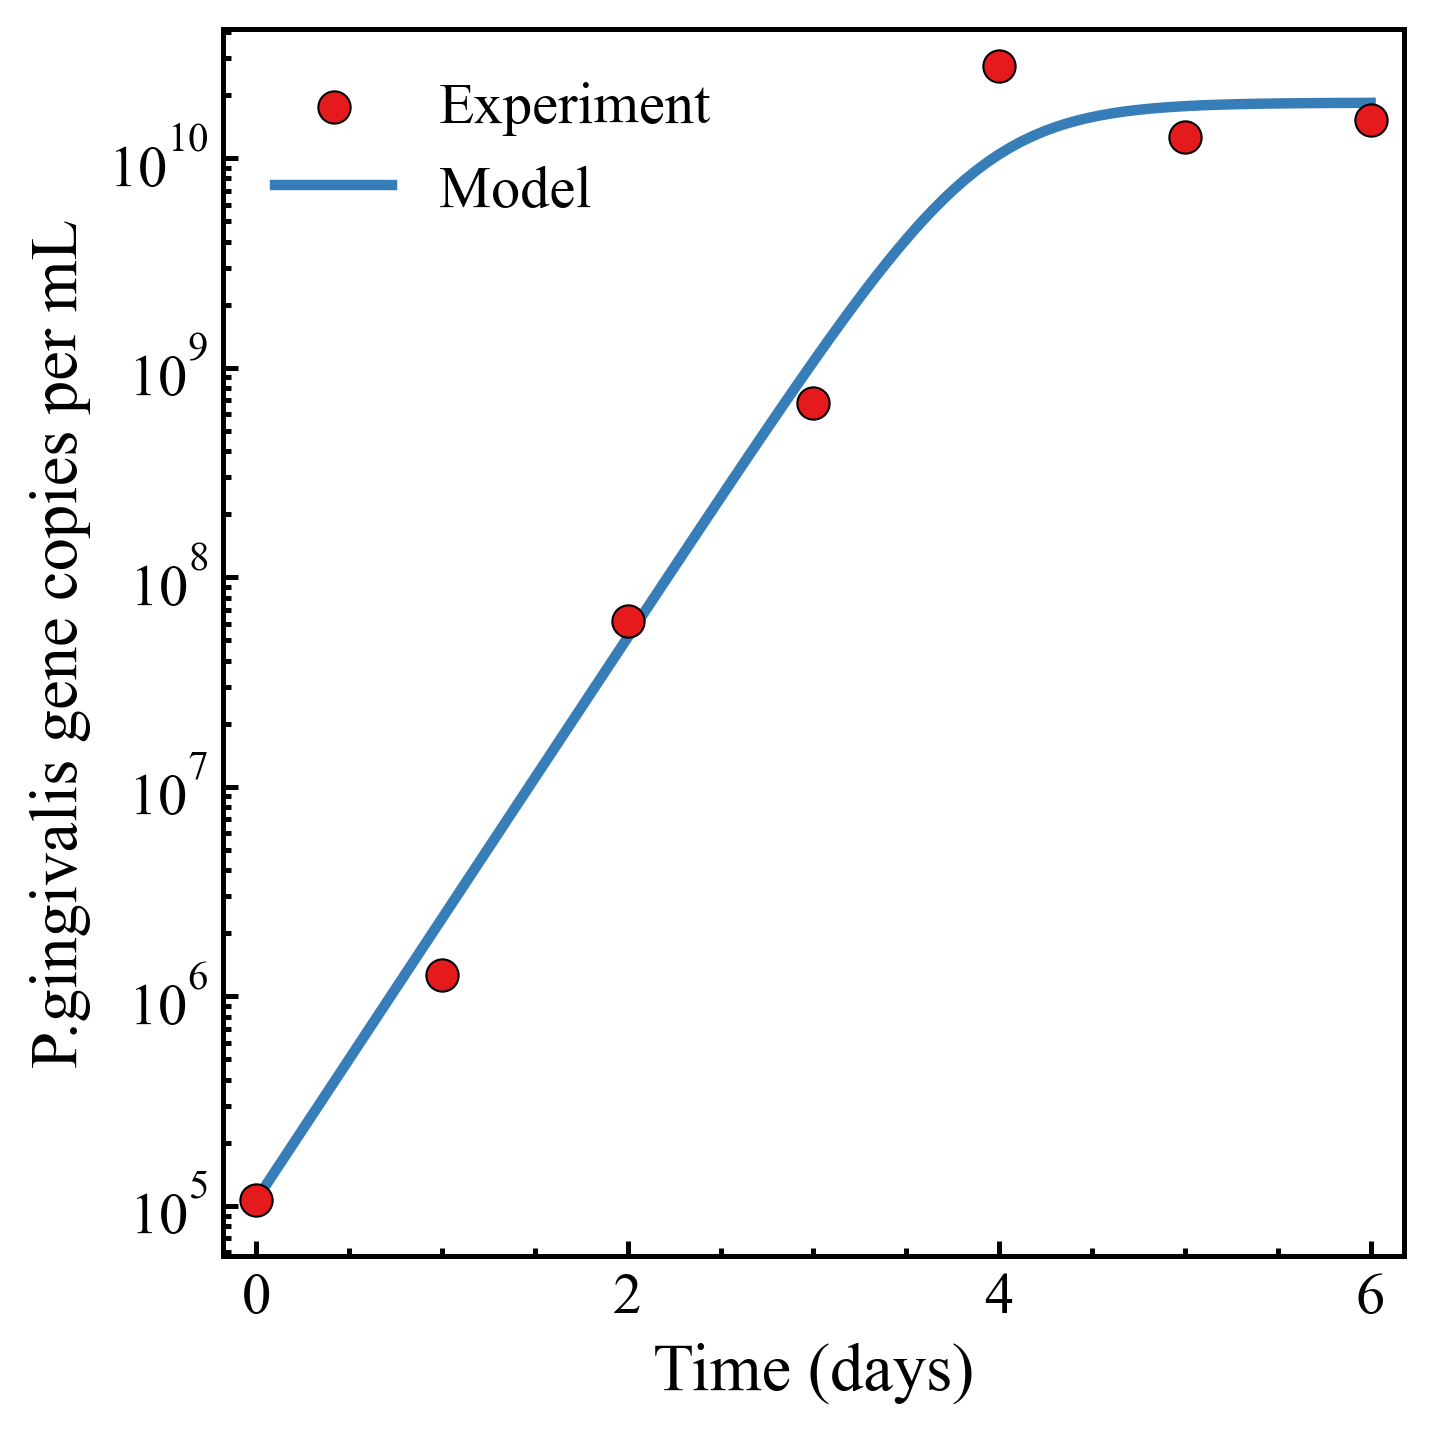

In [ ]:
import matplotlib as mpl

# Set professional matplotlib style
mpl.rcParams.update({
    "figure.dpi": 300, "savefig.dpi": 600,
    "pdf.fonttype": 42, "ps.fonttype": 42,
    "font.family": "serif",
    "font.serif": ["Palatino", "Times New Roman", "DejaVu Serif"],
    "font.size": 14, "axes.labelsize": 16, "axes.titlesize": 16,
    "xtick.labelsize": 14, "ytick.labelsize": 14, "legend.fontsize": 14,
    "axes.linewidth": 1.2, "xtick.major.width": 1.2, "ytick.major.width": 1.2,
    "xtick.direction": "in", "ytick.direction": "in",
    "xtick.minor.visible": True, "ytick.minor.visible": True,
    "lines.linewidth": 2.5, "axes.grid": False
})



# Data
days = np.array([0, 1, 2, 3, 4, 5, 6])
logN_obs = np.array([5.03, 6.10, 7.79, 8.83, 10.44, 10.1, 10.18])
N_obs = 10 ** logN_obs  # Convert logN to N
N0 = N_obs[0]  # Initial population

# Differential equation
def dN_dt(N, t, r, K, G, B):
    return r * N * (1 - (N / K)) * (G * (N / K) + B)

# Model function to integrate ODE and return logN
def model(params, t):
    r, K, G, B = params
    # Ensure K is positive
    K = abs(K)
    # Solve ODE
    N = odeint(dN_dt, N0, t, args=(r, K, G, B), rtol=1e-6, atol=1e-6)[:, 0]
    # Avoid log of zero or negative values
    N = np.clip(N, 1e-10, None)
    return np.log10(N)

# Objective function to minimize (sum of squared errors in log scale)
def objective(params):
    logN_pred = model(params, days)
    return np.sum((logN_pred - logN_obs) ** 2)

# Parameter bounds: [r, K, G, B]
# r: growth rate, typically positive and small
# K: carrying capacity, positive and likely larger than max N_obs
# G, B: coefficients, can be positive or negative
bounds = [(0, 10), (1e4, 1e12), (-100, 100), (-100, 100)]

# Run differential evolution optimization
result = differential_evolution(objective, bounds, seed=42, maxiter=1000, popsize=15)

# Extract optimized parameters
r_opt, K_opt, G_opt, B_opt = result.x
print(f"Optimized parameters:")
print(f"r = {r_opt:.6f}")
print(f"K = {K_opt:.6f}")
print(f"G = {G_opt:.6f}")
print(f"B = {B_opt:.6f}")
print(f"Objective function value (SSE): {result.fun:.6f}")

# Compute fitted values for plotting
t_fine = np.linspace(0, 6, 100)
logN_fit = model([r_opt, K_opt, G_opt, B_opt], t_fine)
N_fit = 10 ** logN_fit


# Plot results
fig, ax = plt.subplots(figsize=(5, 5))
colors = ["#E41A1C", "#377EB8"]  # Red, Blue from ColorBrewer

# Plot experimental data
ax.scatter(days, N_obs, color=colors[0], edgecolors='black',
           s=60, zorder=3, label='Experiment', linewidth=0.5)

# Plot theoretical model
ax.plot(t_fine, N_fit, color=colors[1], linestyle='-', linewidth=2.5, label='Model')

# Axis labels
ax.set_xlabel("Time (days)")
ax.set_ylabel("P.gingivalis gene copies per mL")

# Log scale for clarity
ax.set_yscale("log")

# Ticks, spine, and layout refinement
ax.tick_params(axis='both', which='both', direction='in', width=1.2)
for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_visible(True)
    ax.spines[side].set_linewidth(1.2)

# Smart padding
x_pad = 0.03 * (np.max(days) - np.min(days))
y_pad = 0.5 * (np.max(N_obs) - np.min(N_obs))
ax.set_xlim(np.min(days) - x_pad, np.max(days) + x_pad)
ax.set_ylim(np.min(N_obs) - y_pad, np.max(N_obs) + y_pad)

# Legend
ax.legend(loc='upper left', frameon=False)

# Tight layout
plt.tight_layout()

save_all("fig_growth_fit")

# Show
plt.show()


/tmp/ipython-input-2440268558.py:89: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(beta_grid, gamma_grid, kde_values, levels=20, colors='black', linewidths=0.5,


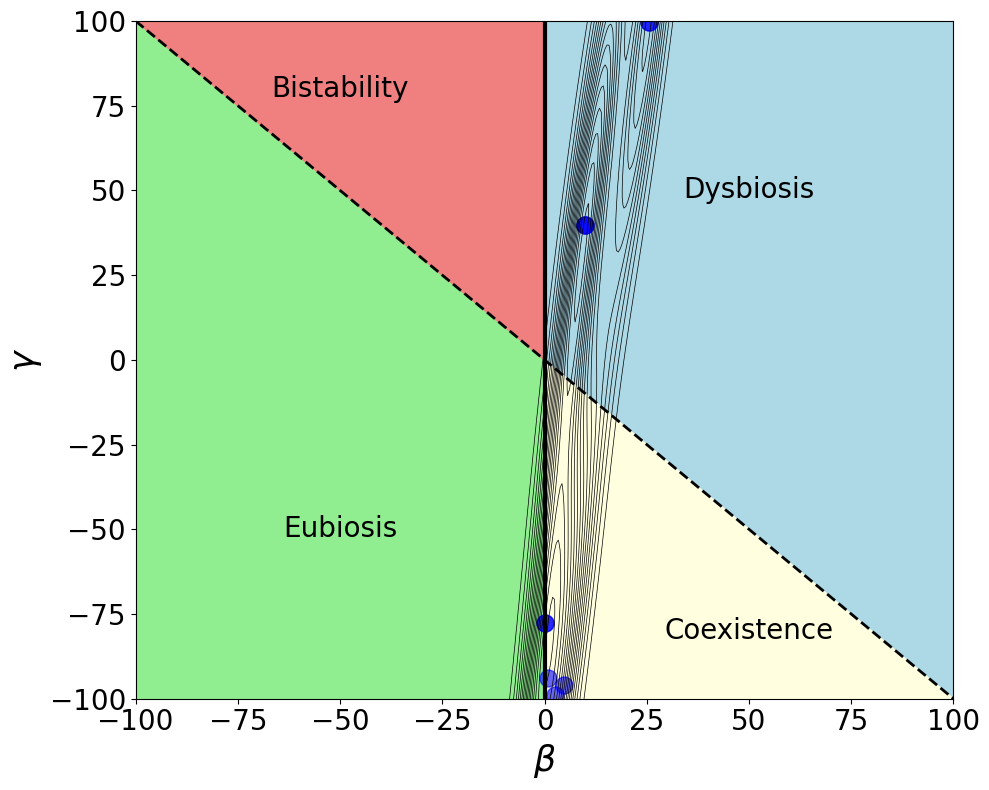

Parameter Statistics:
Mean β (B): 8.890080, Std β: 9.116758
Mean γ (G): -12.584548, Std γ: 79.331091

Individual Simulation Points (β, γ):
Simulation 1: β = 25.471003, γ = 99.737407
Simulation 2: β = 0.049335, γ = -77.730382
Simulation 3: β = 9.886367, γ = 39.655840
Simulation 4: β = 0.792692, γ = -93.769985
Simulation 5: β = 25.471003, γ = 99.737407
Simulation 6: β = 4.854886, γ = -96.010757
Simulation 7: β = 0.049335, γ = -77.730382
Simulation 8: β = 2.553444, γ = -99.046304
Simulation 9: β = 9.886367, γ = 39.655840
Simulation 10: β = 9.886367, γ = 39.655840


In [ ]:

# Data
days = np.array([0, 1, 2, 3, 4, 5, 6])
logN_obs = np.array([5.03, 6.10, 7.79, 8.83, 10.44, 10.1, 10.18])
N_obs = 10 ** logN_obs  # Convert logN to N
N0 = N_obs[0]  # Initial population

# Differential equation
def dN_dt(N, t, r, K, G, B):
    return r * N * (1 - (N / K)) * (G * (N / K) + B)

# Model function to integrate ODE and return logN
def model(params, t):
    r, K, G, B = params
    K = abs(K)  # Ensure K is positive
    N = odeint(dN_dt, N0, t, args=(r, K, G, B), rtol=1e-6, atol=1e-6)[:, 0]
    N = np.clip(N, 1e-10, None)  # Avoid log of zero or negative values
    return np.log10(N)

# Objective function to minimize (sum of squared errors in log scale)
def objective(params):
    logN_pred = model(params, days)
    return np.sum((logN_pred - logN_obs) ** 2)

# Parameter bounds: [r, K, G, B]
bounds = [(1e-3, 100), (0, 1e14), (-100, 100), (-100, 100)]

# Store results from each simulation
results = []
n_simulations = 10

# Run 10 simulations with different seeds
for i in range(n_simulations):
    seed =  random.randint(40, 50)
    result = differential_evolution(objective, bounds, seed=seed, maxiter=1000, popsize=15)
    results.append({
        'r': result.x[0],
        'K': result.x[1],
        'G': result.x[2],
        'B': result.x[3],
        'SSE': result.fun
    })

# Extract B (beta) and G (gamma) values
B_values = np.array([res['B'] for res in results])  # beta
G_values = np.array([res['G'] for res in results])  # gamma

# Define parameter ranges for the phase space
beta_range = np.linspace(-100, 100, 4000)
gamma_range = np.linspace(-100, 100, 4000)
beta, gamma = np.meshgrid(beta_range, gamma_range)

# Create KDE for contour-based shaded region
points = np.vstack([B_values, G_values])
kde = gaussian_kde(points)
# Evaluate KDE on a grid
beta_grid, gamma_grid = np.meshgrid(np.linspace(min(B_values)-10, max(B_values)+10, 100),
                                    np.linspace(min(G_values)-10, max(G_values)+10, 100))
kde_values = kde(np.vstack([beta_grid.ravel(), gamma_grid.ravel()])).reshape(beta_grid.shape)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot critical lines
plt.plot(np.zeros_like(gamma_range), gamma_range, 'k-', linewidth=2, label='β = 0')  # beta = 0
plt.plot(beta_range, -beta_range, 'k--', linewidth=2, label='β + γ = 0')  # gamma = -beta

# Shade regions
# Region I: beta < 0, beta + gamma < 0 (bottom-left, Eubiosis)
plt.fill_between(beta_range, -100, -beta_range, where=(beta_range < 0) & (-beta_range > -100),
                 color='lightgreen', alpha=1, label='Eubiosis')
# Region II: beta > 0, beta + gamma > 0 (top-right, Dysbiosis)
plt.fill_between(beta_range, -beta_range, 100, where=(beta_range > 0) & (-beta_range < 100),
                 color='lightblue', alpha=1, label='Dysbiosis')
# Region III: beta > 0, beta + gamma < 0 (lower-right, Bistability)
plt.fill_between(beta_range, -100, -beta_range, where=(beta_range > 0) & (-beta_range > -100),
                 color='lightyellow', alpha=1, label='Coexistence')
# Region IV: beta < 0, beta + gamma > 0 (upper-left, Unstable)
plt.fill_between(beta_range, -beta_range, 100, where=(beta_range < 0) & (-beta_range < 100),
                 color='lightcoral', alpha=1, label='Bistability')

# Plot contour for simulation points
#plt.contourf(beta_grid, gamma_grid, kde_values, levels=20, cmap='Purples', alpha=0.65)
plt.contour(beta_grid, gamma_grid, kde_values, levels=20, colors='black', linewidths=0.5,
            linestyles='solid', label='Simulation Region')

# Plot individual simulation points
plt.scatter(B_values, G_values, color='blue', s=150, alpha=0.6, label='Simulation Points')

# Add text labels for regions
plt.text(-50, -50, 'Eubiosis', fontsize=20, ha='center', va='center')
plt.text(50, 50, 'Dysbiosis', fontsize=20, ha='center', va='center')
plt.text(50, -80, 'Coexistence', fontsize=20, ha='center', va='center')
plt.text(-50, 80, 'Bistability', fontsize=20, ha='center', va='center')

# Customize plot
plt.xlabel(r'$\beta$', fontsize=25)
plt.ylabel(r'$\gamma$', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axvline(0, color='black', linewidth=3, alpha=1)
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.grid(False)
#plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

# Print parameter statistics and simulation points for reference
print("Parameter Statistics:")
print(f"Mean β (B): {np.mean(B_values):.6f}, Std β: {np.std(B_values):.6f}")
print(f"Mean γ (G): {np.mean(G_values):.6f}, Std γ: {np.std(G_values):.6f}")
print("\nIndividual Simulation Points (β, γ):")
for i, (b, g) in enumerate(zip(B_values, G_values)):
    print(f"Simulation {i+1}: β = {b:.6f}, γ = {g:.6f}")